<a href="https://colab.research.google.com/github/WillyG25/BigData/blob/main/WilfredAGEDA_Data_cleaning_spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Setting up PySpark in colab
!apt-get install openjdk-8-jdk-headless

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 144 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libxtst6 amd64 2:1.2.3-1 [12.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 openjdk-8-jre-headless amd64 8u372-ga~us1-0ubuntu1~20.04 [28.3 MB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 openjdk-8-jdk-headless amd64 8u372-ga~us1-0ubuntu1~20.04 [8,282 kB]
Fetched 

In [2]:
#install Apache Spark 3.0.1 with Hadoop 2.7 .
!wget https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz

--2023-05-19 09:39:26--  https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 138.201.131.134, 2a01:4f8:172:2ec5::2
Connecting to archive.apache.org (archive.apache.org)|138.201.131.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272637746 (260M) [application/x-gzip]
Saving to: ‘spark-3.2.1-bin-hadoop2.7.tgz’

spark-3.2.1-bin-had 100%[===================>] 260.01M  31.3MB/s    in 9.1s    

2023-05-19 09:39:36 (28.4 MB/s) - ‘spark-3.2.1-bin-hadoop2.7.tgz’ saved [272637746/272637746]



In [3]:
#Unzip folder
!tar xf spark-3.2.1-bin-hadoop2.7.tgz


In [4]:
!pip install -q findspark


In [5]:
#set the environment path to enable us to run Pyspark in the Colab environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"


In [6]:
#locate Spark in the system
import findspark
findspark.init()
findspark.find()

'/content/spark-3.2.1-bin-hadoop2.7'

In [7]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("DataCleaningApp")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [8]:
spark


#Loading data into PySpark
We will use the read.csv module. The inferSchema parameter provided will enable Spark to automatically determine the data type for each column but it has to go over the data once. If you don’t want that to happen, then you can instead provide the schema explicitly in the schema parameter.


In [9]:
#First downlad the file from moodle and then upload it to the colab
df = spark.read.csv("/content/combined-data.csv", header=True, inferSchema=True)

In [10]:
df.printSchema()
#you can use df.columns to check the columns without datatypes!

root
 |-- userId: integer (nullable = true)
 |-- userSessionId: integer (nullable = true)
 |-- teamLevel: integer (nullable = true)
 |-- platformType: string (nullable = true)
 |-- count_gameclicks: integer (nullable = true)
 |-- count_hits: integer (nullable = true)
 |-- count_buyId: string (nullable = true)
 |-- avg_price: string (nullable = true)



In [11]:
df.show(5)

+------+-------------+---------+------------+----------------+----------+-----------+---------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|
+------+-------------+---------+------------+----------------+----------+-----------+---------+
|   812|         5648|        1|     android|              69|         8|       NULL|     NULL|
|  1658|         5649|        1|      iphone|              31|         5|       NULL|     NULL|
|  1589|         5650|        1|      iphone|              26|         2|       NULL|     NULL|
|  1863|         5651|        1|     android|              35|         4|       NULL|     NULL|
|   937|         5652|        1|     android|              39|         0|          1|     1.00|
+------+-------------+---------+------------+----------------+----------+-----------+---------+
only showing top 5 rows



In [13]:
#Computing correlation between count game clicks and count hits
df.stat.corr("count_gameclicks","count_hits")

0.9593173964402029

<Axes: xlabel='count_hits', ylabel='count_gameclicks'>

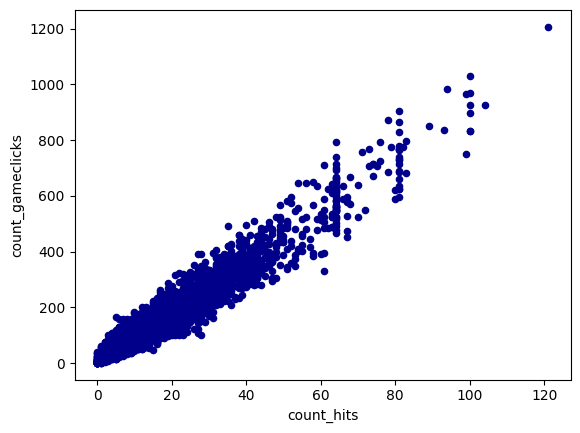

In [14]:
#Creating a scatter plot for visualising the correlation
df2 = df.toPandas()
df2.plot.scatter(x='count_hits', y='count_gameclicks', c='DarkBlue')